"""
- Data preparation
- vanilla network X
    - train on 100% of cifar10
        - save result to cifar/models/vanilla_cifar10.h5
    - train on 50% of cifar10
        - save result to cifar/models/vanilla_50p_cifar10.h5
    - train on 10% of cifar10
        - save result to cifar/models/vanilla_10p_cifar10.h5
- vanilla siamese network 2X
    - train on 100% of cifar10
        - save result to cifar/models/siamese_vanilla_cifar10.h5
    - train on 50% of cifar10
        - save result to cifar/models/siamese_vanilla_50p_cifar10.h5
    - train on 10% of cifar10
        - save result to cifar/models/siamese_vanilla_10p_cifar10.h5
"""

In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from utils import *

2024-04-28 16:16:07.460555: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-28 16:16:07.488294: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 16:16:07.928871: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data preparation

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [6]:
train_images.shape

(50000, 32, 32, 3)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [8]:
train_images.astype('float32') 
test_images.astype('float32') 

train_images = train_images/255.
test_images = test_images/255.

In [9]:
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Vanilla network

In [10]:
def build_vanilla_model(shape, class_num):
    # specify the inputs for the feature extractor network
    inputs = Input(shape)

    x = Conv2D(32, (3, 3), activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (2, 2), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (2, 2), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    x = Flatten()(x)

    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    outputs = Dense(class_num, activation='softmax')(x)

    # build the model
    model = Model(inputs, outputs)
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

### model on the whole dataset

learning

In [11]:
model = build_vanilla_model(train_images[0].shape, 10)

2024-04-28 16:16:09.648262: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9682 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [12]:
history = model.fit(train_images, train_labels_cat, epochs=200, batch_size=512, 
                    validation_data=(test_images, test_labels_cat))

Epoch 1/200


I0000 00:00:1714313771.161342   37020 service.cc:145] XLA service 0x75d8940164f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714313771.161367   37020 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-04-28 16:16:11.182444: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-28 16:16:11.283653: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


22/98 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1292 - loss: 2.2837

I0000 00:00:1714313775.028655   37020 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


96/98 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1883 - loss: 2.1561

I0000 00:00:1714313777.025739   37151 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1628', 4 bytes spill stores, 4 bytes spill loads



98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1894 - loss: 2.1533

I0000 00:00:1714313779.774865   37228 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_93', 8 bytes spill stores, 8 bytes spill loads



98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.1900 - loss: 2.1519 - val_accuracy: 0.3874 - val_loss: 1.7285
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3522 - loss: 1.7464 - val_accuracy: 0.4599 - val_loss: 1.5129
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4200 - loss: 1.5761 - val_accuracy: 0.5025 - val_loss: 1.3928
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4569 - loss: 1.4871 - val_accuracy: 0.5353 - val_loss: 1.3242
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4844 - loss: 1.4143 - val_accuracy: 0.5515 - val_loss: 1.2832
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5042 - loss: 1.3766 - val_accuracy: 0.5667 - val_loss: 1.2410
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5244 - loss: 1.3255 - val_accuracy: 0.5850 - val_loss: 1.1824
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5445 - loss: 1.2720 - val_accuracy: 0.5951 - val_loss: 1

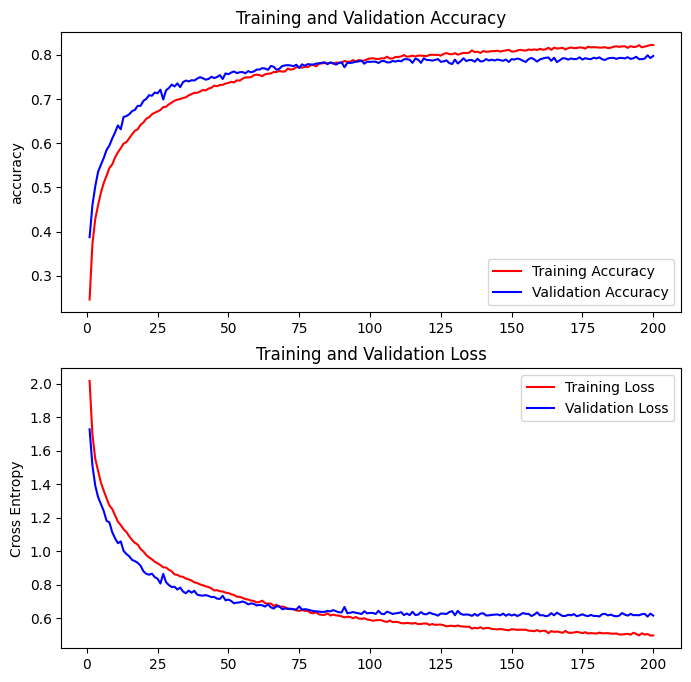

In [13]:
print_history_chart(history)

In [14]:
model.save('cifar/models/vanilla_cifar10.h5')

evaluation

In [15]:
model = tf.keras.models.load_model("cifar/models/vanilla_cifar10.h5")

In [16]:
results_vanilla_full = full_evaluate(model, test_images, test_labels)
# id1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
accuracy_score: 0.7976
f1_score_macro: 0.7962005597105655
f1_score_weighted: 0.7989994402894346


### models on the smaller datasets

#### 50% of the training data

learning

In [17]:
model = build_vanilla_model(train_images[0].shape, 10)

In [18]:
train_images_50p = train_images[:len(train_images)//2]
train_labels_cat_50p = train_labels_cat[:len(train_labels_cat)//2]

In [19]:
history = model.fit(train_images_50p, train_labels_cat_50p, epochs=300, batch_size=512, 
                    validation_data=(test_images, test_labels_cat))

Epoch 1/300
43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1287 - loss: 2.2643

I0000 00:00:1714313955.395413   45497 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1628', 4 bytes spill stores, 4 bytes spill loads



49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.1349 - loss: 2.2534 - val_accuracy: 0.2893 - val_loss: 1.9723
Epoch 2/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2752 - loss: 1.9448 - val_accuracy: 0.3835 - val_loss: 1.7437
Epoch 3/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3363 - loss: 1.7953 - val_accuracy: 0.4250 - val_loss: 1.6012
Epoch 4/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3799 - loss: 1.6711 - val_accuracy: 0.4543 - val_loss: 1.5325
Epoch 5/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4096 - loss: 1.6062 - val_accuracy: 0.4785 - val_loss: 1.4568
Epoch 6/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4299 - loss: 1.5455 - val_accuracy: 0.5017 - val_loss: 1.4073
Epoch 7/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4518 - loss: 1.5043 - val_accuracy: 0.4979 - val_loss: 1.3901
Epoch 8/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4771 - loss: 1.4464 - val_accuracy: 0.5277 - val_loss: 1.

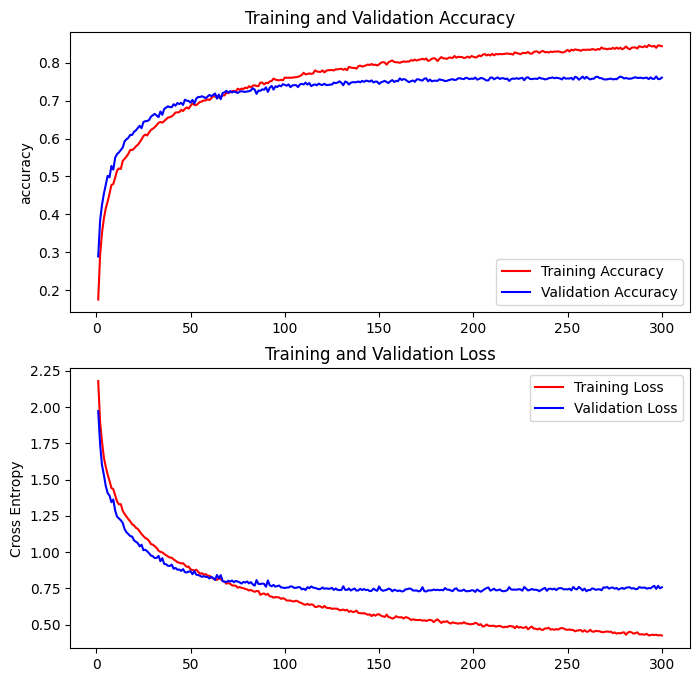

In [20]:
print_history_chart(history)

In [21]:
model.save('cifar/models/vanilla_50p_cifar10.h5')

evaluation

In [22]:
model = tf.keras.models.load_model("cifar/models/vanilla_50p_cifar10.h5")

In [23]:
results_vanilla_50p = full_evaluate(model, test_images, test_labels) #id3

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
accuracy_score: 0.7605
f1_score_macro: 0.7582708156072276
f1_score_weighted: 0.7627291843927724


#### 10% of the training data

learning

In [24]:
model = build_vanilla_model(train_images[0].shape, 10)

In [25]:
train_images_10p = train_images[:len(train_images)//10]
train_labels_cat_10p = train_labels_cat[:len(train_labels_cat)//10]

In [26]:
history = model.fit(train_images_10p, train_labels_cat_10p, epochs=400, batch_size=512, 
                    validation_data=(test_images, test_labels_cat))

Epoch 1/400
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1174 - loss: 2.3095

I0000 00:00:1714314103.063819   57797 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1628', 4 bytes spill stores, 4 bytes spill loads



10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 472ms/step - accuracy: 0.1197 - loss: 2.3067 - val_accuracy: 0.1471 - val_loss: 2.2833
Epoch 2/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1519 - loss: 2.2700 - val_accuracy: 0.1551 - val_loss: 2.2258
Epoch 3/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1832 - loss: 2.1942 - val_accuracy: 0.2104 - val_loss: 2.1235
Epoch 4/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2148 - loss: 2.1189 - val_accuracy: 0.2391 - val_loss: 2.0454
Epoch 5/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2295 - loss: 2.0614 - val_accuracy: 0.2837 - val_loss: 1.9780
Epoch 6/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2662 - loss: 1.9886 - val_accuracy: 0.3000 - val_loss: 1.9211
Epoch 7/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2823 - loss: 1.9391 - val_accuracy: 0.3373 - val_loss: 1.8676
Epoch 8/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2986 - loss: 1.9002 - val_accuracy: 0.3548 - val_

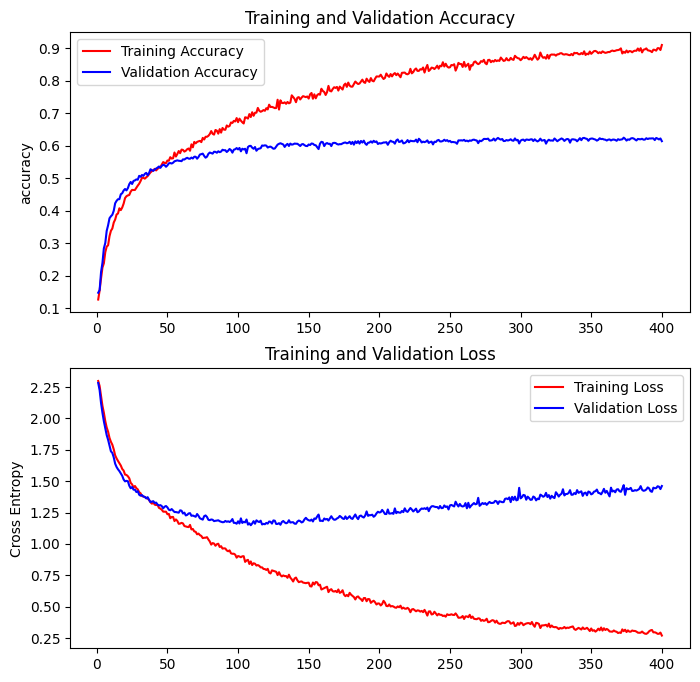

In [27]:
print_history_chart(history)

In [28]:
model.save('cifar/models/vanilla_10p_cifar10.h5')

evaluation

In [29]:
model = tf.keras.models.load_model("cifar/models/vanilla_10p_cifar10.h5")

In [30]:
results_vanilla_10p = full_evaluate(model, test_images, test_labels) #id4

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
accuracy_score: 0.6135
f1_score_macro: 0.6110671850640457
f1_score_weighted: 0.6159328149359543


# Siemese network

In [31]:
def build_siamese_vanilla_model(shape, class_num):
    inputs1 = Input(shape)
    inputs2 = Input(shape)
    
    def one_side(inputs):
        x = Conv2D(32, (3, 3), activation="relu")(inputs)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        x = Conv2D(64, (2, 2), activation="relu")(x)
        x = MaxPooling2D(pool_size=(2,2))(x)
        x = Dropout(0.2)(x)

        x = Conv2D(128, (2, 2), activation="relu")(x)
        x = MaxPooling2D(pool_size=(2,2))(x)
        x = Dropout(0.2)(x)

        x = Flatten()(x)

        x = Dense(32, activation='relu')(x)
        x = Dropout(0.2)(x)
        
        return x
    
    x1 = one_side(inputs1)
    x2 = one_side(inputs2)
    
    x = concatenate([x1, x2])
    
    outputs = Dense(class_num, activation='softmax')(x)

    # build the model
    model = Model([inputs1, inputs2], outputs)
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

In [32]:
def make_pairs(labels):
    samples = {a: list(filter(lambda x: True if x[1]==a else False, enumerate(labels))) for a in np.unique(labels)}
    labels2 = []
    for l in labels:
        labels2.append(random.choice(samples[l[0]])[0])
    return labels2

### model on the whole datasets

learning

In [33]:
model = build_siamese_vanilla_model(train_images[0].shape, 10)

In [34]:
idx2 = make_pairs(train_labels)

y = np.concatenate([train_labels,train_labels[idx2]])
X1 = np.concatenate([train_images,train_images])
X2 = np.concatenate([train_images,train_images[idx2]])

y = to_categorical(y)

In [35]:
history = model.fit([X1, X2], y, epochs=200, batch_size=512, shuffle=True,
         validation_data=([test_images, test_images], test_labels_cat))


Epoch 1/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.2787 - loss: 1.9243 - val_accuracy: 0.4733 - val_loss: 1.4375
Epoch 2/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5099 - loss: 1.3436 - val_accuracy: 0.5414 - val_loss: 1.2666
Epoch 3/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5816 - loss: 1.1789 - val_accuracy: 0.5930 - val_loss: 1.1403
Epoch 4/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6264 - loss: 1.0560 - val_accuracy: 0.6165 - val_loss: 1.0856
Epoch 5/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6512 - loss: 0.9935 - val_accuracy: 0.6325 - val_loss: 1.0516
Epoch 6/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6730 - loss: 0.9323 - val_accuracy: 0.6508 - val_loss: 0.9889
Epoch 7/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6944 - loss: 0.8728 - val_accuracy: 0.6730 - val_loss: 0.9290
Epoch 8/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7082 - loss: 0.8363 -

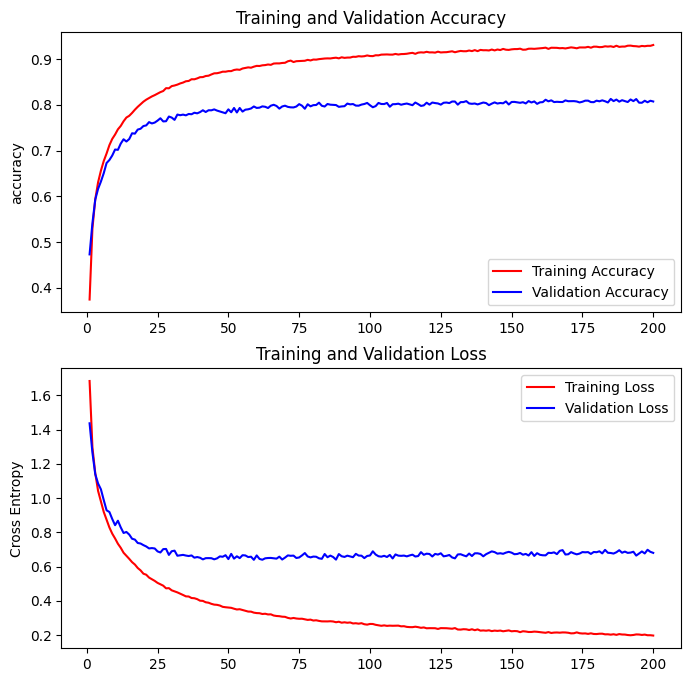

In [36]:
print_history_chart(history)

In [37]:
model.save('- train on 100% of cifar10')

evaluate

In [38]:
model = tf.keras.models.load_model("cifar/models/siamese_vanilla_cifar10.h5")


In [39]:
results_siamese_vanilla = full_evaluate(model, [test_images, test_images], test_labels) #id2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
accuracy_score: 0.8075
f1_score_macro: 0.8068593168191086
f1_score_weighted: 0.8081406831808914


### models on the smaller datasets

#### 50% of the taining data

learning

In [40]:
model = build_siamese_vanilla_model(train_images[0].shape, 10)

In [41]:
train_images_50p = train_images[:len(train_images)//2]
train_labels_50p = train_labels[:len(train_labels)//2]

In [42]:
idx2 = make_pairs(train_labels_50p)
idx3 = make_pairs(train_labels_50p)

y = np.concatenate([train_labels_50p, train_labels_50p[idx2], train_labels_50p[idx3]])
X1 = np.concatenate([train_images_50p, train_images_50p, train_images_50p])
X2 = np.concatenate([train_images_50p, train_images_50p[idx2], train_images_50p[idx3]])
y = to_categorical(y)

In [43]:
history = model.fit([X1, X2], y, epochs=300, batch_size=512, shuffle=True,
         validation_data=([test_images, test_images], test_labels_cat))

Epoch 1/300
147/147 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.2530 - loss: 2.0031 - val_accuracy: 0.4515 - val_loss: 1.4974
Epoch 2/300
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4977 - loss: 1.3701 - val_accuracy: 0.5126 - val_loss: 1.3655
Epoch 3/300
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5658 - loss: 1.2086 - val_accuracy: 0.5509 - val_loss: 1.2570
Epoch 4/300
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6027 - loss: 1.1000 - val_accuracy: 0.5800 - val_loss: 1.1853
Epoch 5/300
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6346 - loss: 1.0234 - val_accuracy: 0.5973 - val_loss: 1.1353
Epoch 6/300
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6576 - loss: 0.9685 - val_accuracy: 0.6035 - val_loss: 1.1272
Epoch 7/300
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6779 - loss: 0.9112 - val_accuracy: 0.6265 - val_loss: 1.0646
Epoch 8/300
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6990 - loss: 0.8565 -

In [44]:
model.save('cifar/models/siamese_vanilla_50p_cifar10.h5')

evaluate

In [45]:
model = tf.keras.models.load_model("cifar/models/siamese_vanilla_50p_cifar10.h5")

In [46]:
results_siamese_vanilla_50p = full_evaluate(model, [test_images, test_images], test_labels) #id5

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
accuracy_score: 0.7707
f1_score_macro: 0.770425848823496
f1_score_weighted: 0.770974151176504


#### 10% of the taining data

learning

In [47]:
model = build_siamese_vanilla_model(train_images[0].shape, 10)

In [48]:
train_images_10p = train_images[:len(train_images)//10]
train_labels_10p = train_labels[:len(train_labels)//10]

In [49]:
idx2 = make_pairs(train_labels_10p)
idx3 = make_pairs(train_labels_10p)
idx4 = make_pairs(train_labels_10p)
idx5 = make_pairs(train_labels_10p)

y = np.concatenate([train_labels_10p, train_labels_10p[idx2], train_labels_10p[idx3], train_labels_10p[idx4],
                   train_labels_10p[idx5]])
X1 = np.concatenate([train_images_10p, train_images_10p, train_images_10p, train_images_10p, train_images_10p])
X2 = np.concatenate([train_images_10p, train_images_10p[idx2], train_images_10p[idx3], train_images_10p[idx4],
                    train_images_10p[idx5]])
y = to_categorical(y)

In [50]:
history = model.fit([X1, X2], y, epochs=300, batch_size=512, shuffle=True,
         validation_data=([test_images, test_images], test_labels_cat))

Epoch 1/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.1715 - loss: 2.2187 - val_accuracy: 0.3063 - val_loss: 1.8984
Epoch 2/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3291 - loss: 1.8040 - val_accuracy: 0.3830 - val_loss: 1.7088
Epoch 3/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4309 - loss: 1.5351 - val_accuracy: 0.4342 - val_loss: 1.5685
Epoch 4/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5056 - loss: 1.3650 - val_accuracy: 0.4615 - val_loss: 1.5057
Epoch 5/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5360 - loss: 1.2581 - val_accuracy: 0.4818 - val_loss: 1.4538
Epoch 6/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5777 - loss: 1.1677 - val_accuracy: 0.5047 - val_loss: 1.4041
Epoch 7/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6053 - loss: 1.0883 - val_accuracy: 0.5123 - val_loss: 1.3871
Epoch 8/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6194 - loss: 1.0398 - val_accuracy: 

In [51]:
model.save('cifar/models/siamese_vanilla_10p_cifar10.h5')

evaluate

In [52]:
model = tf.keras.models.load_model("cifar/models/siamese_vanilla_10p_cifar10.h5")

In [53]:
results_siamese_vanilla_10p = full_evaluate(model, [test_images, test_images], test_labels) #id6

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
accuracy_score: 0.6516
f1_score_macro: 0.6487549317862016
f1_score_weighted: 0.6544450682137983


: 